Згенегуємо два набори значень $x$ і $y$.

In [2]:
import numpy as np

x = np.random.uniform(0, 100, 100)
y = 2 * x + 1 + np.random.randint(0, 25, 100)

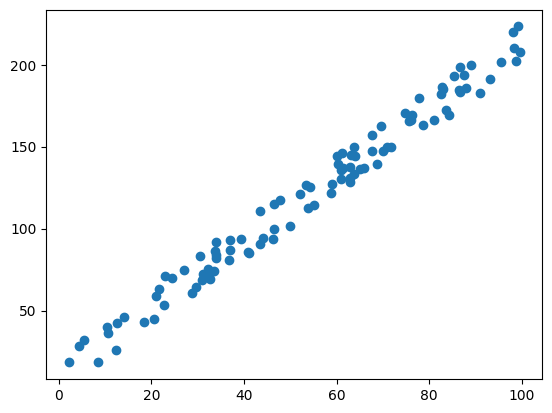

In [3]:
from matplotlib import pyplot as plt

plt.scatter(x, y)

### Завдання.

Знайти значення коефіцієнтів рівняння лінійної регресії $\beta_0$ та $\beta_1$:

1) за допомогою формул з підручника;

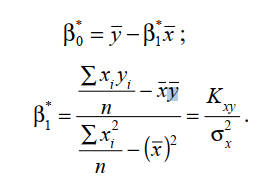

In [4]:
beta1 = (np.mean(x * y) - (x.mean() * y.mean())) / (np.mean(np.power(x, 2)) - np.power(x.mean(), 2))
beta0 = y.mean() - beta1 * x.mean()

print("Beta 0 =", beta0)
print("Beta 1 =", beta1)

Beta 0 = 12.59309327681197
Beta 1 = 2.00325922461072


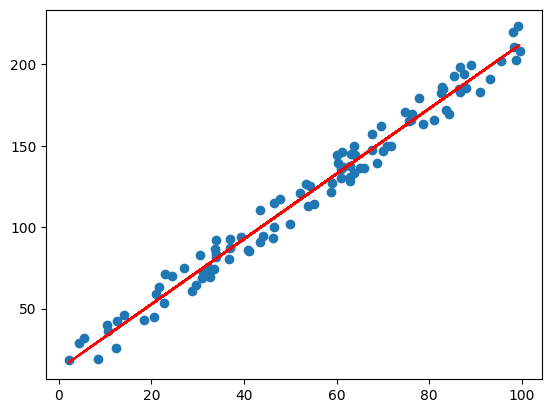

In [5]:
def show_scatter_plot(x, y): 
    plt.scatter(x, y)
    plt.plot(x, beta0 + beta1 * x, c='red')
    plt.show()

show_scatter_plot(x, y)

2) за допомогою моделі sklearn.linear_model.LinearRegression;

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, # перший масив, який потрібно розбити
    y, # другий масив, який потрібно розбити
    test_size=0.2, # розмір меншої групи (20% від загальної кількості даних)
    random_state=42 # фіксація випадкового стану: тепер при перезапуску групи будуть однаковими
)

print('Розмір вибірки для навчання:', len(x_train))
print('Розмір вибірки для тестування:', len(x_test))

Розмір вибірки для навчання: 80
Розмір вибірки для тестування: 20


In [7]:
from sklearn.linear_model import LinearRegression

# ініціалізація моделі
mdl = LinearRegression()

# навчання моделі
mdl = mdl.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

for var_name, coef_value in zip(x, mdl.coef_):
    print(var_name, ': ', coef_value)
    
print('constant term: ', mdl.intercept_)

70.8751999459939 :  [1.99155339]
constant term:  [13.13469473]


In [8]:
from sklearn.metrics import mean_squared_error

mean_forecast = np.ones_like(y_test) * np.mean(y_train) # прогноз, опосередкований на середньому значенні
model_forecast = mdl.predict(x_test.reshape(-1, 1)) # прогноз, заснований на нашій моделі

print('Прогноз, опосередкований на середньому значенні:', mean_forecast)
print('Прогноз, заснований на нашій моделі:', model_forecast)

print('Помилка прогнозу, при середньому значенні:', mean_squared_error(y_test, mean_forecast))
print('Помилка прогнозу з використанням моделі: ', mean_squared_error(y_test, model_forecast))

Прогноз, опосередкований на середньому значенні: [118.57490351 118.57490351 118.57490351 118.57490351 118.57490351
 118.57490351 118.57490351 118.57490351 118.57490351 118.57490351
 118.57490351 118.57490351 118.57490351 118.57490351 118.57490351
 118.57490351 118.57490351 118.57490351 118.57490351 118.57490351]
Прогноз, заснований на нашій моделі: [[105.83250706]
 [188.08907171]
 [164.9936317 ]
 [177.59120885]
 [ 53.99594974]
 [ 70.65417982]
 [174.51718765]
 [133.22337771]
 [105.22740794]
 [154.28643954]
 [151.84981008]
 [ 86.69657241]
 [183.22530971]
 [ 94.5932496 ]
 [185.56150859]
 [ 73.89771539]
 [121.10133483]
 [112.47572641]
 [164.580557  ]
 [134.99252581]]
Помилка прогнозу, при середньому значенні: 2107.776615599317
Помилка прогнозу з використанням моделі:  62.60816171136717


In [9]:
mdl.predict(x_train[0].reshape(-1, 1)), y_train[0]

(array([[119.35782705]]), 126.67364759372637)

3) знайти передбачення для значення змінної $x$, що рівне 120. 

In [21]:
mdl.predict([[120]])

array([[252.12110169]])